# The Time Dependent Energy Balance Model
***
Hello! This module is a guide to constructing the Time Dependent Enegy Balance Model. This model has been explained by Dr. David Archer in a video lecture and is also provided in Dr. Archer's Coursera course, "Global Warming II: Create Your Own Models in Python". This module assumes a schematic understanding of the Scientific processes and the Mathematics involved in the model. It also assumes a basic operational understanding of python, enough to import packages, define variables, arrays, indices and use `for` loops. 

If at all you're unfamiliar with any of the above, you're encouraged to refer to the accompanying modules that focus on those topics.

You're encouraged to open another blank Jupyter notebook alongside this tutorial, so that you may try writing the program step-by-step yourself, as this module walks you through the process.

**Contents**

1. Breaking down the problem
1. Making a procedural algorithm
1. Setting up the equation
1. Defining relevant quantities
1. Translating the mathematical framework into code
1. Plotting our results

## Breaking down the problem

Our model of the Earth assumes no atmosphere and clouds, let's call it the Naked Planet Model. We also assume the Earth to be a perfect black body which implies that it shall absorb all the electromagnetic radiation incident on it and also emit all of the absorbed electromagnetic radiation. 

Now, imagine our naked Black Body Earth placed in the Solar System, some distance away from the Sun. Some solar energy is incident on the Earth. We call this the Solar constant, L. It has the units of Power per unit area. The Earth intrinsically has some reflectivity, called "Albedo" of the planet, which reflects away a fraction of the incident solar energy. The unreflected solar energy incident on the Earth is absorbed- remember that the planet is a black body. Over an interval of time, this incident power from the Sun constitutes the "Heat inflow" to the Earth. 
Note that we will assume all the heat transactions to occur only near the surface of the Earth, which is going to be a layer of water with some known thickness. Therefore, one does not have to complicate things and think about anything that goes on deep inside the planet. 

From Stefan Boltzmann's Law, we know the expression for the electromagnetic power radiated or emitted by a black body with a Surface Temperature, T. So, if we know the surface temperature of the Earth, we know the "Heat outflow" from the planet over an interval of time. 
Therefore, at any given moment, the difference in incoming Solar Power and outgoing radiation (calculated from Surface Temperature) can determine the net Power stored near the Surface of the Earth. After some time interval has passed, we get the net heat content of the surface.
Since the Earth is entirely covered by a layer of water, one can imagine that the total heat content that we just determined, divided by the heat capacity of that layer of water will give the Temperature of the Water, and therefore the Surface Temperature. 

So, we started with some Surface Temperature, Solar constant, albedo and thickness of the water layer, and after a time interval (henceforth called a time step), we determined the new Surface Temperature of the planet. Now using this surface temperature, we can follow the same procedure to find out what happens after another interval of time has elapsed. In effect, successive reiterations of the process will show us how the Earth moves towards an energy balance or an equilibrium.


## Making a procedural algorithm

Now, let's list down the procedure we've devised:

1. Determine the **system parameters** (Solar Constant, Planet's albedo, depth or thickness of the water layer, heat capacity of a layer of the chosen depth).
1. Determine the **Initial conditions** (Initial Surface Temperature, Intial Heat content).
1. Calculate **incident solar power** (If you've noticed, this remains a constant in our model).
1. Calculate **outgoing radiated power** (Using Stefan Boltzmann Law with the current Surface Temperature).
1. Calculate the difference in the incoming and outgoing power to obtain a **rate of change of heat in the surface**.
1. Select a time step, multiply it with the rate of change of heat and obtain the net heat content absorbed or lost by the planet in that interval.
1. Add the lost/gained heat content to the existing heat content.
1. Calculate the Surface Temperature by dividing the total heat content by the heat capacity of the water layer.
1. Use this new Surface Temperature and total heat content to repeat the process and find their values for the next time step. 
1. Make the process reiterative to find what happens after 'n' time steps. 

## Setting up the equations

For the sake of unambiguity, let's set up the key equations:
1. 
\begin{align}
\textrm{Incident Solar Power} & = \frac{L(1-\textrm{albedo})}{4} \\
\end{align}

    where L is the solar constant and the units of Incident Solar Power are Watts/m$^2$.


2. Using the Stefan-Boltzmann Equation, 
\begin{align}
\textrm{Radiated Power} & = \epsilon \sigma T^4 \\
\end{align}

    where $\sigma$ is the Stefan Boltzmann constant, equal to 5.67e$^{-8}$, T is the Surface Temperature and $\epsilon$ is a parameter that determines how closely the object follows black body behaviour. Since we assume Earth to be a perfect black body, we'll set $\epsilon = 1 $. The units of the radiated power are also Watts/m$^2$.


3. Rate of change of heat in the surface, or what we may call 'heat rate' henceforth, is given by,
\begin{align}
\frac{dQ}{dt} & = \textrm{Incident Solar Power} - \textrm{Radiated Power} = \frac{L(1-\textrm{albedo})}{4} - \epsilon \sigma T^4 \\
\end{align}
where $\frac{dQ}{dt}$ is the heat rate which will allow us to calculate the lost/gained heat for an interval of time.
    

4. The relation between temperature, total heat content and heat capacity is,
\begin{align}
\textrm{Temperature} & = \frac{\textrm{Total Heat Content}}{\textrm{Heat capacity}} \\
\end{align}
Note that the units of Heat content are Joules/m$^2$.

5. In the previous point, one may have inferred that we must obtain the heat capacity in the units of Joules/m$^{2}$K.
To do this, we multiply the specific heat of water with the mass of water contained in the entire water column with a unit cross sectional area. 

## Let's Code!

At last, all the framework we need is complete. We can now dive into the programming part.
Start by importing the two python packages that we will need, `numpy` and `matplotlib`. Next, define all the relevant parameters in the problem. Make sure you note their units to remain systematic and avoid errors.

In [11]:
#This imports the desired packages. 
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#Setting up the main parameters

#Define your time interval size
timeStep = 10                                           # years 

waterDepth = 4000                                       # meters

L = 1350                                                # Watts/m^2 (Solar Constant)

albedo = 0.3

epsilon = 1

sigma = 5.67*10**(-8)                                   # W/m2 K^4

SpecificHeatCapacity = 4200                             #(J/kg K) (for water)

Density = 1000                                          #(kg/m^3) (for water)

Volume = waterDepth                                     #m^3 (of a water column with unit cross sectional area)

WaterColumnMass = Density * Volume                      #(kg/m^2)

HeatCapacity = SpecificHeatCapacity * WaterColumnMass   #(J/m^2 K)

print("Heat capacity is : ", HeatCapacity, "J/m^2 K")

Heat capacity is :  16800000000 J/m^2 K


So far we've explicitly defined each parameter for our system and obtained the heat capacity as a function of the water depth. Can we now start calculating the Surface Temperatures? Well hold on, we still don't have any initial Temperature and Heat content to start any calculations with. But even before that, thinking about this- when we will be doing the calculations to find surface temperature and total heat content reiteratively, where will each value that we find go? We must first create a place where the values that we find can be placed. 
Therefore, we need to define three empty arrays. But of what size? Well each time you go through the process of calculations, you get one value of Surface Temperature, one for the instantaneous heat rate and one for the total heat content. So, say in total, if we take n time steps, or reiterate the calculations n times, we would need arrays with n empty spaces.
So we do the following:

In [13]:
#Define the number of timesteps you want to take.

nSteps = 100 

#Create empty arrays with as many spaces as the number of time steps you want to take.
#The np.zeros(size) command creates empty arrays


Heatrate = np.zeros(nSteps)           #Heat content per unit time (as defined in equation 3)

HeatContent = np.zeros(nSteps)        #Total heat content at each time step

T = np.zeros(nSteps)                  #Temperature

Now we can define the initial Temperature and the initial Heat Content as the zeroeth elements of their respective arrays.

In [14]:
T[0] = 0                                           #Initial Temperature
HeatContent[0] = HeatCapacity * T[0]               #Initial heat content (Heat content and Temperature are related by
                                                   # the heat capacity)

We know that we have to make repeated calculations through equations 2, 3 and 4 for each time step. However, before we move into that, let's write the calculations involved for a single time step. 

Let this time step be called 't'. 

You probably rememeber that to determine the `Heatrate` at each time step, we use the Temperature from the previous time step. 
Therefore, equation 3 will become:

In [15]:
Heatrate[t] = L*(1-albedo)/4 - epsilon * sigma * T[t-1]**4       #[t-1] indicates we're referring to the previous time step

NameError: name 't' is not defined

You probably got an error while running the previous cell. It's because we did not formally define what 't' is. We'll get back to that, ignore the error for now.

The next equation will determine the Heat Content. Since this is the total heat content, it is the sum of the heat content in the previous time step and the heat content due to the Heatrate of the present timestep. So, the equation is:

In [16]:
HeatContent[t] = HeatContent[t-1] + Heatrate[t] * 24*365*3600*timeStep    

NameError: name 't' is not defined

Ignore the NameError, we'll shortly attend to it.
Again, [ t ] refers to the value for the same time step while [ t-1 ] refers to the value for the previous time step. We multiply heat rate with 24 X 365 X 3600 because this is the number of seconds in a year. Remember that Watts is Joules/second. So the time step has to be accordingly scaled.

Finally, the last relevant equation for finding Temperature from Heat Content is:

In [17]:
T[t] = HeatContent[t] / HeatCapacity

NameError: name 't' is not defined

What do we want now? We have a code that does the calculations we need, but only for one time step. So, we should put it in a loop, which keeps doing those calculations as long as the time steps are in our desired range. This can be done using a 'for' loop. 

In [18]:
# A 'for' loop that iteratively determines different quantities of interest corresponding 
# to each time step using the previous step's data.

for t in range (1, nSteps):               # 't' has become our index
    
    Heatrate[t] = L*(1-albedo)/4 - epsilon * sigma * T[t-1]**4

    HeatContent[t] = HeatContent[t-1] + Heatrate[t] * 24*365*3600*timeStep

    T[t] = HeatContent[t] / HeatCapacity

Congratulations! Your simulation is complete.

For each cycle in the loop, the corresponding values of Heat rate, Heat Content and Temperature get added to the arrays we had defined. By the end of the loop, we'd have all our arrays filled with the computed values. Why don't you print the arrays with `print(T)`, `print(HeatContent)` and  `print(Heatrate)` commands to check?

All you need to do now is present your data in a format that best illustrates the evolution of the system. That brings us to our final segment: Plotting.

## Plotting

While there may be several ways of observing the evolution of the system, let's say we want to plot the result as a graph of Temperature v/s Time. It's a nice intuitive graph to help us imagine how the Surface Temperature varied as the planet approached thermal equilibrium. 

To plot this graph, we need two variables, therefore, two arrays. For Temperature, we have the array `T`. For time, we can construct an array as the multiples of the fundamental time step we used. We do this as follows:

In [19]:
#Define a linear array whose elements are consecutive integers and range is the same as the number of time steps.

t = np.linspace(0, nSteps, nSteps)

#Now the time elapsed can simply be:

Time = t*timeStep                  # Time elapsed is nothing but integral multiples of the timeStep.

Call the `plt.plot()` function to plot the graph. Use `plt.xlabel()` and `plt.ylabel()` to label the axis. End your plotting code with `plt.show()`.

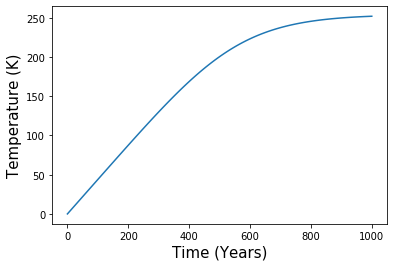

In [20]:
plt.plot(Time, T)

plt.rcParams['figure.figsize']=[14,10]                # Function to control Figure size

plt.ylabel("Temperature (K)", fontsize='15')

plt.xlabel("Time (Years)", fontsize='15')

plt.show()

## Putting Things Together

We can now compile our entire code into a single function. Suppose we want a function which takes the input of the number of desired time steps and returns the Temperature v/s Time graph for the inputted number of Time Steps as well as returns the final value of Temperature and Radiated Power at the last Time Step. 

The input can be defined by `nSteps = int(input("Number of Steps:"))`. When the cell is run, it automatically asks you to input a desired value. The compiled code in the form of a function will become:

In [21]:
import numpy as np
import matplotlib.pyplot as plt


#====================================================
#Defining the function

def EnergyBalanceModel(nSteps):
    
        #Setting up the main parameters

        timeStep = 10        # years
        waterDepth = 4000        # meters
        L = 1350                 # Watts/m2
        albedo = 0.3
        epsilon = 1
        sigma = 5.67*10**(-8)          # W/m2 K4
        SpecificHeatCapacity = 4200  #(J/kg K)
        Density = 1000
        Volume = waterDepth      #m^3
        ColumnWaterMass = Density * Volume   #(kg/m^2)
        HeatCapacity = SpecificHeatCapacity * ColumnWaterMass      #(J/m^2 K)
        print("Heat capacity is : ", HeatCapacity, "J/m^2 K")
        
        #====================

        #Setting up arrays for different quantities that will be sequentially determined corresponding to each time step during the iterative process

        Heatrate = np.zeros(nSteps)                        #Heat content per unit time
        HeatContent = np.zeros(nSteps)
        T = np.zeros(nSteps)                               #Temperature
        
        T[0] = 0                                           #Initial Temperature
        HeatContent[0] = HeatCapacity * T[0]               #Initial heat content

        #====================

        # A 'for' loop that iteratively determines different quantities of interest corresponding 
        # to each time step using the previous step's data.

        for t in range (1, nSteps):
            Heatrate[t] = L*(1-albedo)/4 - epsilon * sigma * T[t-1]**4

            HeatContent[t] = HeatContent[t-1] + Heatrate[t] * 24*365*3600*timeStep

            T[t] = HeatContent[t] / HeatCapacity

        #====================

        #Plotting

        t = np.linspace(0, nSteps, nSteps)    
        plt.plot(t*timeStep, T)
        plt.rcParams['figure.figsize']=[8,6]
        plt.ylabel("Temperature (K)", fontsize='12')
        plt.xlabel("Time (Years)", fontsize='12')


        return plt.show() , print(T[-1], epsilon * sigma * T[-1]**4)    # The index [-1] gives the last element 
                                                                        # of the respective array.
#==================================================== 

Now all you have to do is call the function! 

An alternative method to using the input line is manually writing your desired `nSteps` while calling the function. This is what calling the function looks like:

Number of Steps:1000
Heat capacity is :  16800000000 J/m^2 K


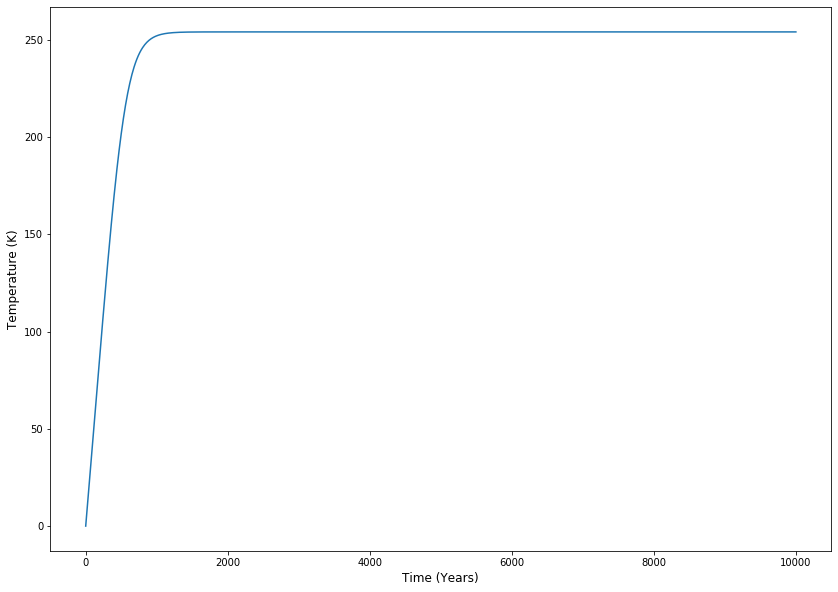

254.06637407730716 236.24999999999923


(None, None)

In [23]:
nSteps = int(input("Number of Steps:"))
EnergyBalanceModel(nSteps)

## Play Around!

The best way to teach yourself is to play around with the code. See what happens when you tweak different parameters. Increase the number of Steps from 10 to 1000. Do you notice any equilibrium behaviour? What happens when we increase the Time Step to very large values? What happens if it's too small? What about a planet with a very thin layer of water? You could decrease the Water Depth and find out. What about being in a different place in the solar system and therefore having a vastly different Solar Constant? In fact, you may even take things up a notch and try and add an atmosphere to the model. In principle, you'd have to follow a similar trail of thought as we did in this case, only incorporating how the atmosphere interacts with the system.

There's room to be as creative as one can get!